<a href="https://colab.research.google.com/github/MaxDangVu136/ml_carpentry_workshop_2023/blob/main/ml_carpentry_workshop_day3_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep: extract more complex features (but also more instability), ill-advised for data with low variance.
Width: potentially more noise, but good for data with more variance

Three pillars of deep learning:
1. Increased computing power (parallelisation, i.e. GPU)
2. Larger data storage or datasets
3. More complex network architectures

Steps to apply deep learning:
1. Formulate/outline problem
2. Idenitfy inputs and outputs
3. Prepare data (potentially normalise data, prevents space explosion or early convergence)
4. Choose loss function and optimiser
5. Train model
6. Perform prediction/classification
7. Measure performance
8. Tune hyperparameters
9. Share/deploy model

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import random

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Initialise random seed
seed = 1
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
penguins = sns.load_dataset('penguins')
print(np.unique(penguins['species']))

['Adelie' 'Chinstrap' 'Gentoo']


In [4]:
penguins.dropna(inplace=True)
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [5]:
penguins['species']

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [6]:
penguins['species'].astype('category')

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: category
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

In [7]:
# Clean data to retain only quantitative info
penguins_filtered = penguins.drop(columns=['island', 'sex'])
penguins_filtered

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [8]:
# Identifying inputs and outputs
penguin_features = penguins_filtered.drop(columns=['species'])  # input: physical characteristics
target = pd.get_dummies(penguins_filtered['species']) # output: penguin species

penguin_features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [9]:
target

,Adelie,Chinstrap,Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
338,0,0,1
340,0,0,1
341,0,0,1
342,0,0,1


In [10]:
# Split dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    penguin_features, target, test_size=0.2, shuffle=True, stratify=target)

In [11]:
# Define machine learning models and their architecture
def functional_model():
  inputs = keras.Input(shape = X_train.shape[1])
  hidden_layer = keras.layers.Dense(10, activation="relu")(inputs)
  output_layer = keras.layers.Dense(3, activation="softmax")(hidden_layer)
  model = keras.Model(inputs=inputs, outputs=output_layer, name='Functional')

  return model

def sequential_model():
  model = keras.Sequential(name='Sequential')
  model.add(keras.layers.Input(shape=X_train.shape[1]))
  model.add(keras.layers.Dense(10, activation='relu'))
  model.add(keras.layers.Dense(3, activation = 'softmax'))

  return model

In [12]:
model1 = sequential_model()
model2 = functional_model()

In [13]:
model1.summary()
model2.summary()

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83 (332.00 Byte)
Trainable params: 83 (332.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "Functional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 


In [14]:
# Compile model by defining optimisation scheme and loss function
model = functional_model()
model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy())

In [15]:
# Train model
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
9/9 [==============================] - 3s 4ms/step - loss: 515.9416
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 438.8507
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 369.0902
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 299.7365
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 227.1608
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 155.2448
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 79.6367
Epoch 8/10
9/9 [==============================] - 0s 5ms/step - loss: 17.9405
Epoch 9/10
9/9 [==============================] - 0s 3ms/step - loss: 19.2673
Epoch 10/10
9/9 [==============================] - 0s 3ms/step - loss: 9.4324


<Axes: >

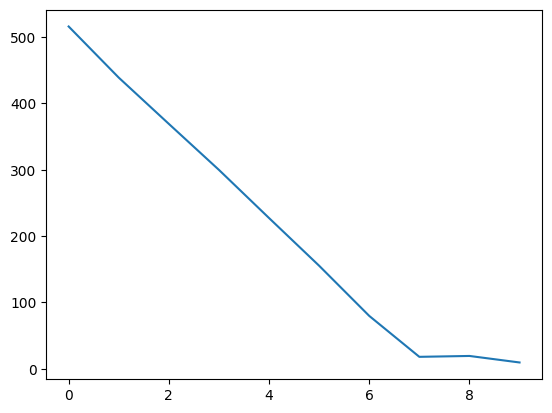

In [16]:
# Visualise results
sns.lineplot(x=history.epoch, y=history.history['loss'])

In [17]:
# Perform prediction/classification
y_pred = model.predict(X_test)
prediction = pd.DataFrame(y_pred, columns=target.columns)
prediction

3/3 [==============================] - 0s 6ms/step


,Adelie,Chinstrap,Gentoo
0,0.015534,9.844660e-01,2.521332e-18
1,0.999909,9.089543e-05,2.513769e-09
2,0.000002,4.567816e-26,9.999978e-01
3,0.172372,7.342817e-16,8.276280e-01
4,0.999996,4.070738e-06,8.452987e-10
...,...,...,...
62,0.999998,1.084615e-06,7.752104e-07
63,0.021736,3.325315e-18,9.782644e-01
64,0.999996,2.467002e-07,4.112191e-06
65,0.991745,6.034908e-10,8.254847e-03


In [18]:
predicted_species = prediction.idxmax(axis='columns')
true_species = y_test.idxmax(axis='columns')

In [19]:
# Measure performance
matrix = confusion_matrix(true_species, predicted_species)
print(matrix)

[[19  6  4]
 [13  1  0]
 [ 8  0 16]]


In [20]:
print(accuracy_score(true_species, predicted_species))

0.5373134328358209


How to improve model accuracy?
- More data (i.e. sample size, batch size, no. of batches)
- Deeper/wider networks
- Change how it learns (learning rate)

<Axes: xlabel='Predicted Label', ylabel='True label'>

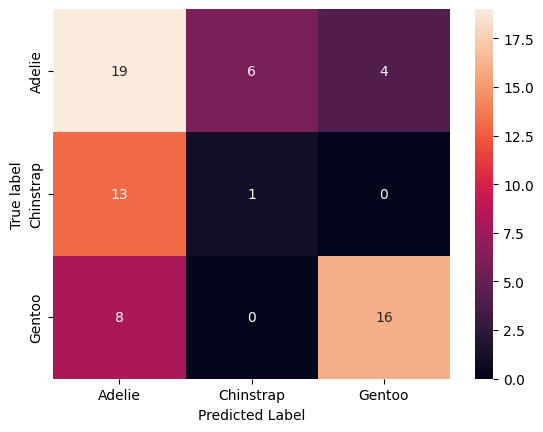

In [21]:
# Visualising the predictions
confusion_df = pd.DataFrame(matrix, index=y_test.columns.values, columns=y_test.columns.values)
confusion_df.index.name = 'True label'
confusion_df.columns.name = 'Predicted Label'

sns.heatmap(confusion_df, annot=True)

In [22]:
# Save, share and deploy model
model.save('penguin_model')
loaded_model = keras.models.load_model('penguin_model')